<a href="https://colab.research.google.com/github/vaidande/DogVsCat-VGG16/blob/main/DogVsCat_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob

In [3]:
IMAGE_SIZE = [224, 224]
 
train_path = '/content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000/dataset/training_set'
valid_path = '/content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000/dataset/test_set'

In [4]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) #+ [3]: No. of channels.(RGB)
                                                                                   #weights='imagnet': retrives the same weights which where used in the ImageNet competition.
                                                                                   #include_top=False: removes the default VGG16 input, Flatten and Output layer.

58892288/58889256 [==============================] - 0s 0us/step


In [5]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
#don't train existing weights.
for layer in vgg16.layers:
  layer.trainable = False #Not to update weights (as we are using ImageNet weights), we are freezing the VGG16 architecture.

In [7]:
#useful for getting no. of output classes.
folders = glob('/content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000/dataset/training_set/*')

In [8]:
#flattening..
x = Flatten()(vgg16.output)

In [9]:
#adding Dense layer..
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg16.input, outputs=prediction) #creating model object.. 
                                                      #inputs=vgg16.input specifies the input we created
                                                      #outputs=prediction specifies the ouput layer we created

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000/dataset/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000/dataset/test_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [14]:
 
checkpoint_path = '/content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000'
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [20]:
r = model.fit_generator(training_set,
                        validation_data = test_set,
                        epochs=10,
                        steps_per_epoch = len(training_set),
                        validation_steps = len(test_set), callbacks = [cp_callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
250/250 [==============================] - 121s 486ms/step - loss: 0.1175 - accuracy: 0.9553 - val_loss: 0.2212 - val_accuracy: 0.9350

Epoch 00001: saving model to /content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000
Epoch 2/10
250/250 [==============================] - 121s 485ms/step - loss: 0.1026 - accuracy: 0.9605 - val_loss: 0.2246 - val_accuracy: 0.9340

Epoch 00002: saving model to /content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000
Epoch 3/10
250/250 [==============================] - 120s 479ms/step - loss: 0.1132 - accuracy: 0.9563 - val_loss: 0.2884 - val_accuracy: 0.9175

Epoch 00003: saving model to /content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000
Epoch 4/10
250/250 [==============================] - 120s 480ms/step - loss: 0.1540 - accuracy: 0.9449 - val_loss: 0.2546 - val_accuracy: 0.9320

Epoch 00004: saving model to /content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000
Epoch 5/10
250/250 [==============================] - 120s 478ms

In [19]:
 
import os
checkpoint_dir = os.path.dirname(checkpoint_path)
os.listdir(checkpoint_dir)

['sampleSubmission.csv',
 'test1.zip',
 'train.zip',
 'dogs-vs-cats.zip',
 'DogsvsCat Kaggle Competition',
 'cats-vs-dogs-training8000test2000.zip',
 'DogvsCat-8000-2000',
 'archive.zip',
 'kaggle.json',
 'flowers',
 'DogvsCat-8000-2000.data-00000-of-00001',
 'DogvsCat-8000-2000.index',
 'checkpoint']

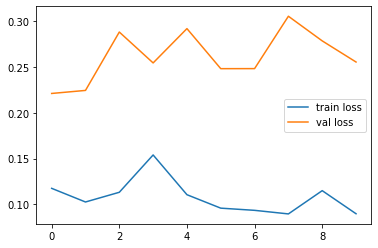

<Figure size 432x288 with 0 Axes>

In [21]:
#plotting loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

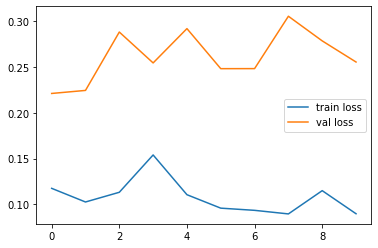

<Figure size 432x288 with 0 Axes>

In [22]:
#plotting acc
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
#saving model..
from tensorflow.keras.models import load_model
model.save('model_vgg16.h5')

In [24]:
x=image.load_img('/content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000/dataset/single_prediction/pixie_grass.jpg', target_size=(224,224))

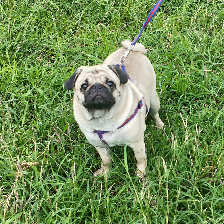

In [29]:
x

In [25]:
test_img = image.img_to_array(x)
test_img = test_img/255
test_img = np.expand_dims(test_img, axis = 0)
result = model.predict(test_img)

In [26]:
result

array([[1.0325017e-18, 1.0000000e+00]], dtype=float32)

In [27]:
a=np.argmax(model.predict(test_img), axis = 1)

In [28]:
if a==0:
  print("Its a Cat!")
else:
  print("Its a Dog!")

Its a Dog!
